In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../..'))

from importlib import reload
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from spark.super_simulation import SuperSimulation
from spark.incarceration_transitions import IncarceratedTransitions
from spark.release_transitions import ReleasedTransitions
from spark.compartment_transitions import CompartmentTransitions
from spark.spark_policy import SparkPolicy


In [2]:
test = open('../../state/IL/IL_prison_RAE_model_inputs.yaml')
test_sim = SuperSimulation(test)
# test_sim.simulate_baseline('pretrial', 'prison')

/Users/pacopoler/.local/share/virtualenvs/recidiviz-research-LWZgHH0n/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [3]:
data = test_sim.pop_simulations['baseline'].sub_simulations['50%'].total_population_data
data.index = data.time_step
data.total_population.plot()

KeyError: 'baseline'

initialization time:  0.0331110954284668
simulation_time:  33.605844020843506
initialization time:  0.01784205436706543
simulation_time:  32.31694316864014


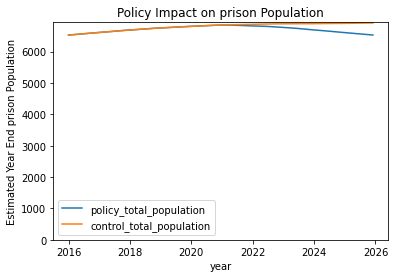

In [6]:
tis_percentages = {
    '100%': 1, 
    '85%': 0.85, 
    '50%': 0.5, 
}


# Policy Option Methods
def remove_automatic_enhancement(tis_percentage, retroactive=False):
    return partial(CompartmentTransitions.apply_reduction, 
                   reduction_dict={'probation': 15 * 12 * tis_percentages[tis_percentage]}, 
                   reduction_type='+',
                   retroactive=retroactive
                  )


policy_list_non_retroactive = [
    SparkPolicy(policy_fn=remove_automatic_enhancement(tis_percentage),
                spark_compartment='prison',
                sub_population={'tis_percentage': tis_percentage},
                apply_retroactive=False)
    for tis_percentage in tis_percentages
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison')

In [7]:
simulation_tag = 'IL_remove_automatic_enhancements'
test_sim.upload_simulation_results_to_bq('recidiviz-staging', simulation_tag)

     year compartment     total_cost  month  day
0    2015      prison       0.000000     12    1
1    2016      prison       0.000000      1    1
2    2016      prison       0.000000      2    1
3    2016      prison       0.000000      3    1
4    2016      prison       0.000000      4    1
..    ...         ...            ...    ...  ...
355  2025   probation -139893.670168      7    1
356  2025   probation -145148.417666      8    1
357  2025   probation -150469.455218      9    1
358  2025   probation -155856.955561     10    1
359  2025   probation -161310.778070     11    1

[360 rows x 5 columns]


/Users/pacopoler/.local/share/virtualenvs/recidiviz-research-LWZgHH0n/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


     year compartment  life_years  month  day
0    2015      prison    0.000000     12    1
1    2016      prison    0.000000      1    1
2    2016      prison    0.000000      2    1
3    2016      prison    0.000000      3    1
4    2016      prison    0.000000      4    1
..    ...         ...         ...    ...  ...
355  2025   probation -671.500361      7    1
356  2025   probation -696.723552      8    1
357  2025   probation -722.264941      9    1
358  2025   probation -748.125357     10    1
359  2025   probation -774.304124     11    1

[360 rows x 5 columns]
     year compartment                  scenario   population  month  day
0    2015      prison   policy_total_population  6528.789423     12    1
1    2016      prison   policy_total_population  6535.627355      1    1
2    2016      prison   policy_total_population  6542.513796      2    1
3    2016      prison   policy_total_population  6549.448745      3    1
4    2016      prison   policy_total_population  6556.43220